In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline

## Predicting the future sales of a shop
Historical data of sales is provided in the training set. We need to forecast the number of products sold in every shop for the test set. The list of shops and products slightly changes every month

In [11]:
sales = pd.read_csv('../datasets/futuresales/sales_train.csv')
items = pd.read_csv('../datasets/futuresales/items.csv')
item_categories = pd.read_csv('../datasets/futuresales/item_categories.csv')
shops = pd.read_csv('../datasets/futuresales/shops.csv')
test = pd.read_csv('../datasets/futuresales/test.csv')

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
sales.shape

(2935849, 6)

In [15]:
sales.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [17]:
len(sales['shop_id'].unique())

60

In [19]:
len(sales['item_id'].unique())

21807

In [20]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


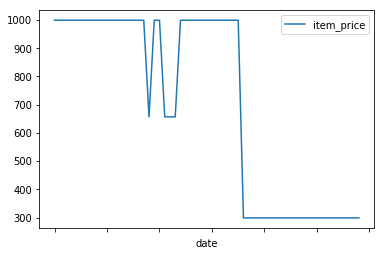

In [22]:
sales[sales['item_id'] == 22154].plot(x='date', y='item_price')

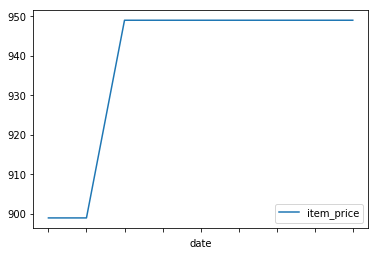

In [23]:
sales[sales['item_id'] == 2552].plot(x='date', y='item_price')

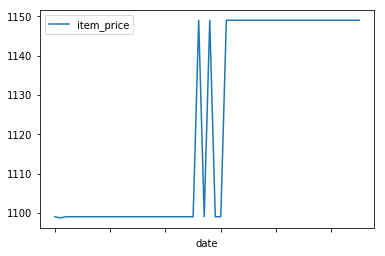

In [25]:
sales[sales['item_id'] == 2555].plot(x='date', y='item_price')

In [26]:
sales['item_id'].unique()

array([22154,  2552,  2554, ...,  7610,  7635,  7640])

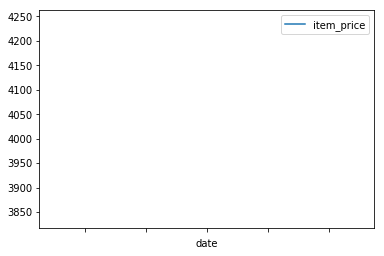

In [29]:
sales[sales['item_id'] == 7640].plot(x='date', y='item_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110aae6d8>]],
      dtype=object)

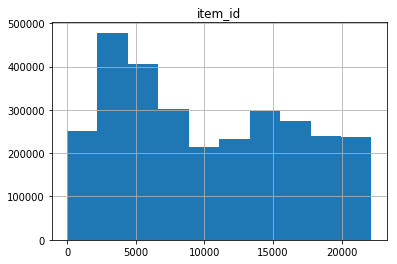

In [36]:
sales.hist('item_id')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b71438>]],
      dtype=object)

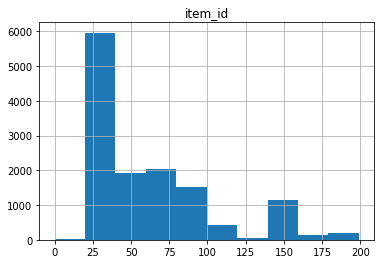

In [38]:
sales[sales['item_id'] < 200].hist('item_id')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e0d6b00>]],
      dtype=object)

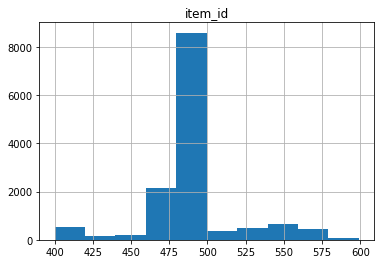

In [43]:
sales[(sales['item_id'] < 600) &  (sales['item_id'] >= 400)].hist('item_id')

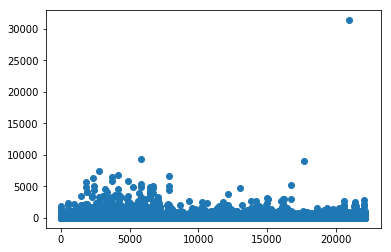

In [53]:
sales['item_id'].value_counts()
plt.scatter(sales['item_id'].value_counts().index, sales['item_id'].value_counts())

In [55]:
sales['item_id'].value_counts().describe()

count    21807.000000
mean       134.628743
std        406.938186
min          1.000000
25%          6.000000
50%         32.000000
75%        119.000000
max      31340.000000
Name: item_id, dtype: float64